In [1]:
import numpy as np
from dobbel import dobbellogger
from help_functies import *
from calibrator3 import calibrate
import matplotlib.pyplot as pltd
dob = dobbellogger()

In [21]:
import matplotlib.pyplot as plt

In [2]:
cali = {'gyro bias': np.array([ 0.5007456 , -0.113276  ,  0.01238024]), 'gyro std': np.array([0.08902153, 0.09786986, 0.11230942]), 'acc values': np.array([ 0.99164924, -1.00316003,  1.00062089, -0.99832454,  1.01896869, -1.00376521]), 'acc std': np.array([0.00355673, 0.00311978, 0.00605471])}
q_rot = np.array([0.23289724, 0.6497377, 0.66263071, -0.2907238])

In [3]:
dob.connect()
dob.log(5, 400, 8, 2000)
dob.download()
data = dob.datadf

# Deze code niet vaker dan 1 keer uitvoeren!
data = remove_nan(data)
data = rotate_data(data, q_rot)
data = remove_bias(data, cali)

Logging data for 5s
Done! The data is located in self.datadf


In [4]:
data.head(2000)
# # Create the plot
# plt.figure(figsize=(10, 6))
# plt.plot(data['timestamp'], data['x_acc'], label='x_acc', color='orange')
# plt.plot(data['timestamp'], data['y_acc'], label='y_acc', color='red')
# plt.plot(data['timestamp'], data['z_acc'], label='z_acc', color='pink')
# 
# # Add labels and legend
# plt.xlabel('Timestamp')
# plt.ylabel('Acceleration (m/s^2)')
# plt.title('Acceleration Data Over Time')
# plt.legend()
# plt.grid(True)
# 
# # Display the plot
# plt.show()

,timestamp,x_acc,y_acc,z_acc,x_gyro,y_gyro,z_gyro
0,0.0,0.063915,0.096408,1.018855,-0.350645,-0.114190,0.358640
1,32.0,0.068270,0.091328,1.018880,-0.448211,0.052926,0.630842
2,35.0,0.062512,0.093903,1.023015,0.074482,-0.144251,-0.413001
3,36.0,0.062738,0.093634,1.019906,0.067010,-0.162562,-0.254187
4,38.0,0.063402,0.089492,1.014830,0.052067,-0.199185,0.063441
...,...,...,...,...,...,...,...
1992,4950.0,0.048692,0.074508,1.019515,0.111288,-0.069558,0.018744
1993,4953.0,0.048944,0.071281,1.017182,-0.069861,0.235715,-0.001403
1994,4955.0,0.046889,0.073868,1.018617,0.046311,-0.110691,-0.020271
1995,4957.0,0.052189,0.072354,1.020544,0.043433,-0.066443,-0.062127


In [30]:
# De tijd die het duurt tussen het loslaten van de dobbelsteen en het neerkomen van de dobbelsteen
def gooi_checker(data, N, gamma, first_last=False):
    luchttijd = set()
    za_data = data.copy()
    za_data['squared norm'] = data['x_acc'] ** 2 + data['y_acc'] ** 2 + data['z_acc'] ** 2
    za = [0] * len(za_data)

    gooitijd = []
    verg_data = data.copy() - data.iloc[0]
    gooi_data = data.copy()
    gooi_data['squared norm'] = verg_data['x_acc'] ** 2 + verg_data['y_acc'] ** 2 + verg_data['z_acc'] ** 2
    gooi = [0] * len(gooi_data)
    
    gedaan = False
    voltooid = False
    
    for i in range(N, len(za_data) - N):
        if all([True if waarde > 0.01 * gamma else False for waarde in gooi_data['squared norm'][i-N:i+N]]) and not gedaan:
            gooitijd.append(data['timestamp'][i])
            gooi[i] = 1
            gedaan = True
        elif all([True if element < gamma else False for element in za_data['squared norm'][i-N:i+N]]) and not voltooid:
            luchttijd.update(data['timestamp'][i-N:i+N])
            za[i] = 1
            gooitijd = sorted(gooitijd)
            voltooid = True

    luchttijd = sorted(luchttijd)
    
    total_gooi_duration = luchttijd[0] - gooitijd[-1]
    total_lucht_duration = luchttijd[-1] - luchttijd[0]
    total_raap_duration = gooitijd[-1]
    za_data = za
    gooi_data = gooi
    
    print("Dobbel tijd oprapen = ", total_raap_duration)
    print("Dobbel tijd van oprapen tot loslaten = ", total_gooi_duration)
    print("Dobbel tijd in de lucht = ", total_lucht_duration)
    print("Dobbel tijd tot loslaten vanaf begin programma = ", total_raap_duration + total_gooi_duration)
    return total_lucht_duration, total_gooi_duration, total_raap_duration, za_data, gooi_data

In [34]:
dob.connect()
dob.log(5, 400, 8, 2000)
dob.download()
data = dob.datadf

# Deze code niet vaker dan 1 keer uitvoeren!
data = remove_nan(data)
data = rotate_data(data, q_rot)
data = remove_bias(data, cali)

Logging data for 5s
Done! The data is located in self.datadf


In [35]:
data.head(2000)

,timestamp,x_acc,y_acc,z_acc,x_gyro,y_gyro,z_gyro
0,0.0,-1.013765,0.027651,0.070958,-0.431147,-0.236916,0.145610
1,31.0,-1.014270,0.028455,0.073591,-0.180075,0.276991,0.138638
2,34.0,-1.015603,0.029571,0.078012,-0.017328,-0.065629,-0.057088
3,35.0,-1.013575,0.031581,0.072589,0.173590,-0.200814,0.053363
4,38.0,-1.016833,0.031553,0.068913,-0.044364,0.270761,0.300379
...,...,...,...,...,...,...,...
1992,4951.0,0.987036,-0.040265,-0.051622,0.063377,-0.159539,0.193404
1993,4953.0,0.984123,-0.043972,-0.053539,-0.066780,-0.025168,0.077914
1994,4955.0,0.986537,-0.040081,-0.051748,0.000872,0.188353,0.121324
1995,4958.0,0.987915,-0.039108,-0.050121,0.036137,0.152493,-0.185497


Dobbel tijd oprapen =  423.0
Dobbel tijd van oprapen tot loslaten =  1377.0
Dobbel tijd in de lucht =  49.0
Dobbel tijd tot loslaten vanaf begin programma =  1800.0


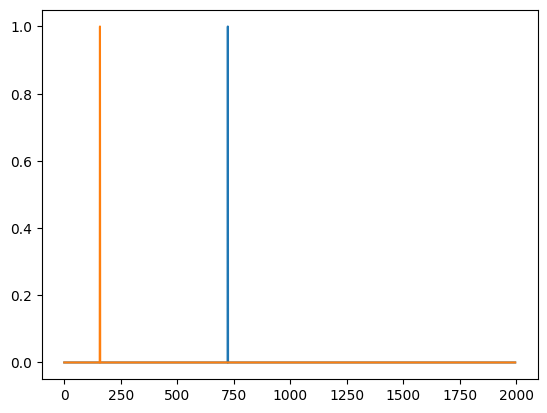

In [36]:
total_lucht_duration, total_gooi_duration, total_raap_duration, za_data, gooi_data = gooi_checker(data, 10, 0.15)
plt.plot(za_data)
plt.plot(gooi_data)

In [42]:
dob.connect()
dob.log(5, 400, 8, 2000)
dob.download()
data = dob.datadf

# Deze code niet vaker dan 1 keer uitvoeren!
data = remove_nan(data)
data = rotate_data(data, q_rot)
data = remove_bias(data, cali)

Logging data for 5s
Done! The data is located in self.datadf


In [43]:
data.head(2500)

,timestamp,x_acc,y_acc,z_acc,x_gyro,y_gyro,z_gyro
0,0.0,0.060513,0.096471,1.025131,-0.078090,-0.064814,-0.052049
1,30.0,0.060411,0.098262,1.029470,-0.295639,-0.026510,0.269889
2,32.0,0.059034,0.089035,1.026254,-0.056809,-0.071715,0.205680
3,35.0,0.061137,0.087527,1.016448,0.090007,-0.062657,-0.238985
4,37.0,0.061843,0.091441,1.018378,-0.054336,0.317309,0.172614
...,...,...,...,...,...,...,...
1988,4948.0,0.983531,-0.032329,-0.062434,-0.004479,-0.156424,0.112534
1989,4951.0,0.983985,-0.031803,-0.062971,-0.119111,0.059541,0.171060
1990,4953.0,0.985287,-0.033831,-0.058848,-0.003141,-0.070229,0.114731
1991,4956.0,0.985571,-0.035951,-0.063896,0.101317,-0.023011,-0.109022


Dobbel tijd oprapen =  1970.0
Dobbel tijd van oprapen tot loslaten =  1804.0
Dobbel tijd in de lucht =  45.0
Dobbel tijd tot loslaten vanaf begin programma =  3774.0


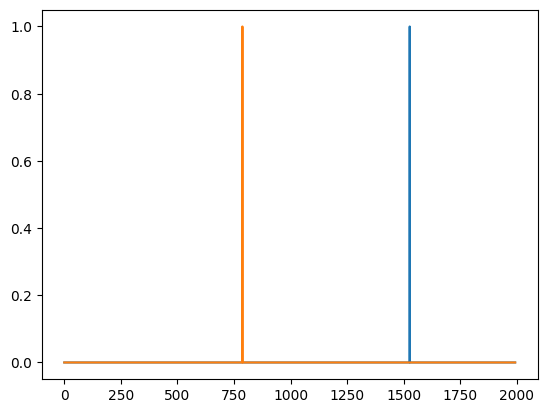

In [44]:
total_lucht_duration, total_gooi_duration, total_raap_duration, za_data, gooi_data = gooi_checker(data, 10, 0.15)
plt.plot(za_data)
plt.plot(gooi_data)

In [45]:
dob.connect()
dob.log(5, 400, 8, 2000)
dob.download()
data = dob.datadf

# Deze code niet vaker dan 1 keer uitvoeren!
data = remove_nan(data)
data = rotate_data(data, q_rot)
data = remove_bias(data, cali)

Logging data for 5s
Done! The data is located in self.datadf


In [46]:
data.head(2500)

,timestamp,x_acc,y_acc,z_acc,x_gyro,y_gyro,z_gyro
0,0.0,-0.089903,-0.083047,-0.968565,0.338609,0.303220,0.486017
1,35.0,-0.091237,-0.084057,-0.975508,0.077765,-0.621769,-0.296223
2,38.0,-0.091048,-0.088577,-0.981297,0.006831,-0.116777,0.242497
3,40.0,-0.090328,-0.086576,-0.978904,-0.070996,-0.067115,0.033861
4,43.0,-0.090990,-0.081112,-0.975964,-0.028638,-0.105275,-0.187051
...,...,...,...,...,...,...,...
1974,4896.0,-0.020826,-1.013241,0.115388,-0.192519,-0.065485,0.043939
1975,4899.0,-0.019883,-1.014360,0.118023,0.096898,0.151678,-0.190536
1976,4900.0,-0.019442,-1.005404,0.118909,-0.135974,-0.108247,-0.005154
1977,4903.0,-0.020310,-1.006837,0.114659,-0.181210,-0.025839,0.173902


Dobbel tijd oprapen =  880.0
Dobbel tijd van oprapen tot loslaten =  1265.0
Dobbel tijd in de lucht =  45.0
Dobbel tijd tot loslaten vanaf begin programma =  2145.0


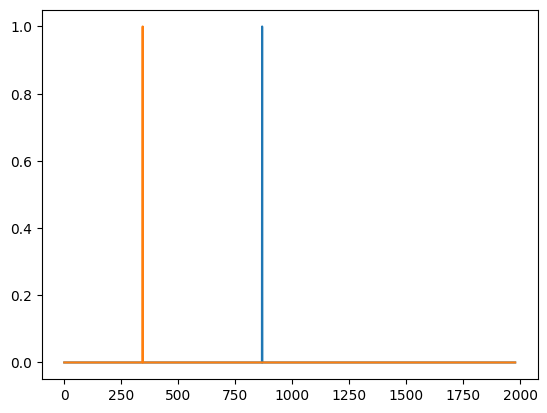

In [47]:
total_lucht_duration, total_gooi_duration, total_raap_duration, za_data, gooi_data = gooi_checker(data, 10, 0.15)
plt.plot(za_data)
plt.plot(gooi_data)